# Fuel Quality Data Exploration
Hi, again its Adedayo and i am very grateful to be part the the Hamoye intenship, we were given a data set and asked to explore every nook and cranny of it and i !!! 
This notebook is an oppurtunity for me  to seek for advise and opinions from all my colleagues and the Hamoye instructors on my approach to this dataset,

## I want to know if,
 * the questions I asked were good ones?
 *  the analysis method i useds were adequate?
 *  you have a better  analysis option?
 *  the observations were accurate?
 *  you have more observations? 
 *  you agree with my insights and suggestions?
 *  you don't agree? Please tell me why.
 
 
 #### I also want everyone to pick up something new from this notebook
 
 
#### How to use this notebook if  you download to your system
* if you just want to read it do not click on run
* for the section dealing with the fuel data input the file location for the data on your device if you want to run
* make sure the kernel is active and you have ran the whole program once if you want to make random ages at different points

## Data Description
The data set is the fuel Quality Data from the Federal Energy Regulatory Comission

### what is our goal?
we were not exactly given an end goal like predicting or classifying something so i am just asking the data set anything i can think of.....

## Importing important packages loading the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec#plotting
import seaborn as sns #plotting
sns.set(style="whitegrid") # to give the graphs a particular design
plt.rc('figure', figsize=(20, 10)) #to make all my graphs the same size

In [2]:
#url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
#fuel_data = pd.read_csv(url, error_bad_lines=False)
#fuel_data.describe(include='all')

# I commented it out because i alread have the dataset saved locally in my case
fuel_data = pd.read_csv('.....input/fuel_ferc1.csv')#put your own file path here
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2002_12_27_4_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


from the summary statistics table we can infer that report year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit are categorical data and will be most suited to frequency exploration with the other columns.

The recordid is just a serial number and is unimportant

utility id appears to be numerical grouping of the plant, the numbers used are cut from the recordId,

their over 2315 unique plants in the dataset, after a bit of googling I discovered the powerplants in a group are either located in the same US state or in states in close proximity to each other

for example the two power plants in with utility id 1 are in indiana
and most of the power plants in group 2 are in Alabama and neighbouring states as well as other groups (check them I cant claim to be very exhaustive in my search)

So i think it is safe to say the utility Id can be used as a location grouping


In [4]:
fuel_data.info()#data type info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [5]:
fuel_data.isnull().sum() #checking for missing values 
# i did not this value much as a factor in my visualiztion so suggestions are welcome

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
#count the number of rows that have a specific value using the groupby function
# from this we can look at the most common fuel_unit

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [7]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()
#counts the roals that have a particular fuel_type

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [8]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()
#this is slightly different, I grouped the rows by fuel type but gave another break down of units associated with
# the fuel type

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

 from the above we can infer that the mostcommon unit of measurement in general is mcf but;
 for oil is bbl,coal (ton), gas(mcf), nuclear(gramsU) with far less prevalent other units
 
 the key issue is **waste** and **other** which seem to be ,measured by various unit as they are not specific.
 
 Waste is most often measured by refered to as ton and other  is also ton but with very high bbl rates
 


In [9]:
fuel_data.loc[fuel_data.isnull().any(axis=1)].head(5)
#this returns a list of rows that have missing values
# df.loc[] is very useful when you want to view a snapshot of dataframe that fills a specified condition
# in this case the condition it is any missing values

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.00,0.480


In [10]:
#rather than filling the missing data with fillna with the most common unit mcf using
#fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf') 

# i decided to do something a bit more complex by mactching the missing the most commonly used unit based on their fuel type
fuel_data['fuel_unit']=fuel_data.groupby('fuel_type_code_pudl').fuel_unit.transform(lambda x:x.fillna(x.mode()[0]))

#check if missing values in fueldata have been filled
fuel_data["fuel_unit"].isnull().sum()

0

In [11]:
fuel_data.iloc[[66,152,277,626,627]] #data.iloc is very useful for viewing specific indexes
#i used it to view the row i have filled

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,bbl,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,gramsU,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,ton,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,gramsU,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,gramsU,313736.0,0.119756,57.534,0.00,0.480


this method was succesful

this was a fun but **COMPLETELY UNNECESARY**  procedure because i ended up focusing on the fuel type rather than the units used.

Although it was a bit useless and we would have been just fine in with just doing mcf even though this table is more accurate. 

it is great practice for tables are highly dependent on their categorical data

# Data Viaualization

I will take this in three segements:
* how do the features relate with each other: let check their correlation
* categorical data, we look at categorical data and their relation shio to the numerical data
* Quantitative/numerical data: look at the relationship to each other
* New features: Creating new features that i feel will give better insight due to the interaction effect



## How do the features relate with each other

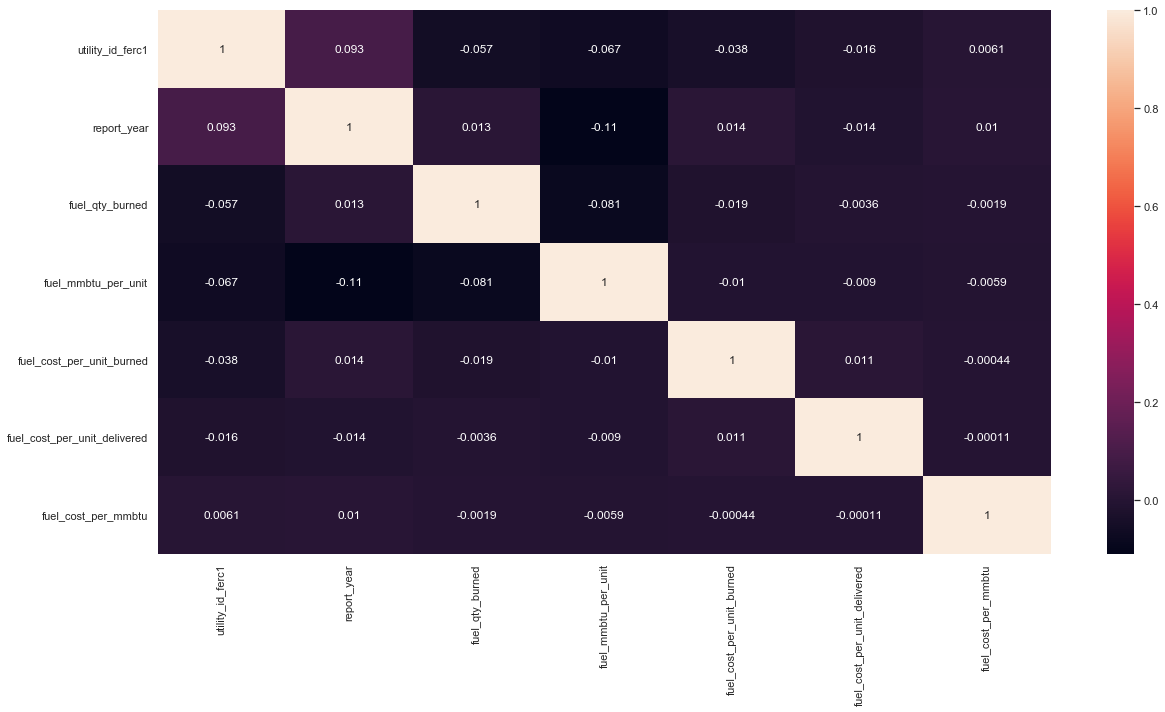

In [12]:
sns.heatmap(fuel_data.corr(), annot=True) 

they all have low correlation even in parts that appear to be obvious i feel it its a sign of some crazy outliers, let try again with a randomsample of 500 values

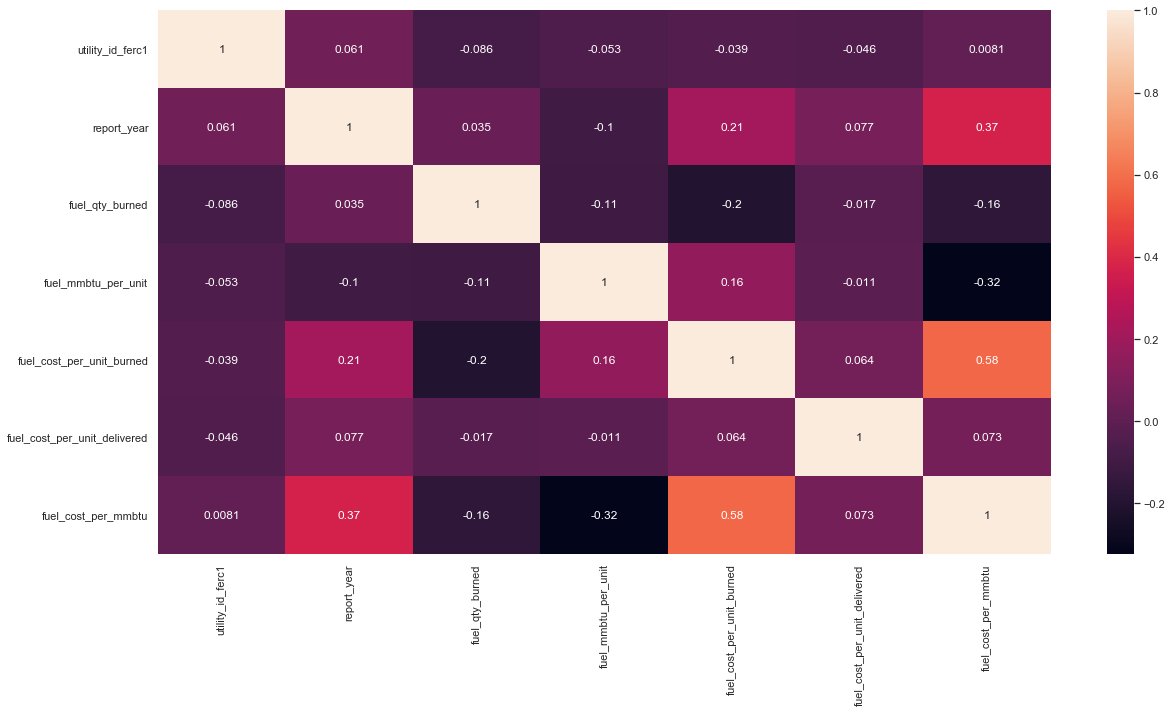

In [13]:
#Select a sample of the dataset
sample_df = fuel_data.sample(n=500, random_state=4)
sns.heatmap(sample_df.corr(), annot=True)


much better this gives us a direction to focus on when plotting other graphs

## Categorical data
as i earlier stated i am going to be doing frequency plots (barplot, histogram and distribution plots) for them in comparison to other tables so lets ask some questions? the categorical features are the plant name, the year, theutility id appears to be categorical,the fuel type, the measurement unit, the plants are too many but they can be grouped by fuel type, how the fuel is measured is inconsequential to the analysis.
the focus will be on fuel type and year in question 
* **How popular is a fuel type?:** we already know gas is the most popular but by how much and how popular are the others

* **How cost effective is each fuel type?:** 
* **How has the price of each fuel type changed over the years?:**
* **Are some fuels becoming more popular over time?



#### How popular is a fuel type?

In [14]:
col={"gas":"cyan","coal":"black","oil":"red","nuclear":"springgreen","waste":"saddlebrown","other":'slategray'}
#i was having issues with the color denoting each fuel change every time i used it as a hue,
#so i hard coded the colors in a dictionary so they remain constant

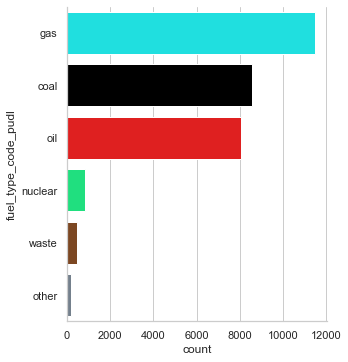

In [15]:
sns.catplot(y='fuel_type_code_pudl',
            kind="count",data=fuel_data,palette=col,order=fuel_data['fuel_type_code_pudl'].value_counts().index)

**observations:** the most commonly used fuel source is gas,coal,oil
* (i have a quetion i feel like a more accurate way would be to count when grouped by plantname but this fels adequate enough what are your thoughts?)

### what is the cheapest fuel source

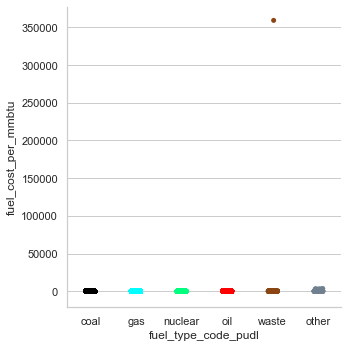

In [16]:
sns.catplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',palette=col, data=fuel_data)


**observations:** this graph is not adequate at all we came across a barrier that happens many times in this note the number of outliers and the sheer size of the dataset
i chose to reduce the price limits as sampled data might include massive outliers

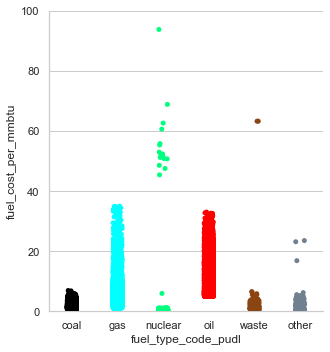

In [17]:
g= sns.catplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',palette=col,data=fuel_data)
g.set(ylim=(0,100))

**observations:** although the prices come in a range of values,**coal** is consisdently low  with few outliers, while the others come in a wider range of values with higher figgures.... a swarmplot would have have helped to view the distribution but the dataset would be too large 
* what are your thoughts? i did not want to sample and limit the dataset all at once because the dataset span years there could have been price increases

### How did fuel prices change over the years
this section takes a look at the price range of fuel accross different power plants over 20 years
to deal with the outliers the graphs are in a logarithmic scale


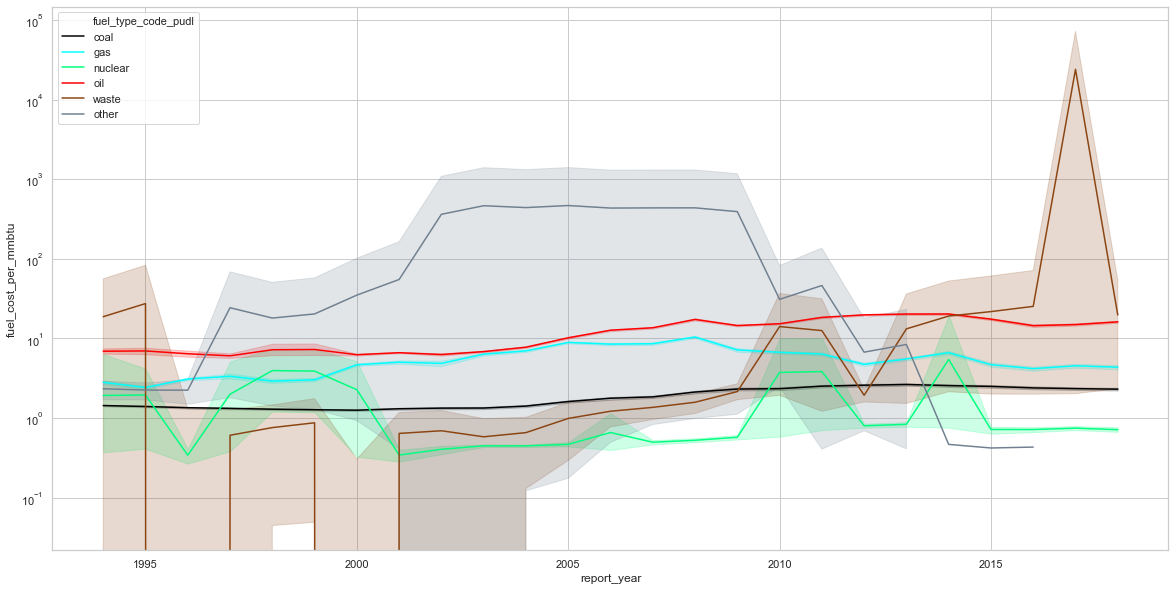

In [18]:
g=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',palette=col,data=fuel_data)
g.set_yscale("log")
#unlike other categorical plots, hue helps to give a more coherent line plot as the data is plotted in different streams

**Observations**
 * The cost of **coal** has stayed realtively stable over the 20 years
 * The cost of **gas** has stayed realtively stable over the 20 years with dips and peaks
 * The cost of **oil** has stayed has been on a  rise over 20 years
 * The cost of **nuclear** varies wildly with sharp peaks and deep dips.
 * The cost of **other**  varies wildly partly because it is a wide range of materials and because it is not present in every year
 * The price of **waste** rose rapidly for over a decade but it is now on a sharp decline


### Are some fuels becomming more popular over time? 
how do I measure this by creating a lineplot of report year to energy output with fuel quantity burned,although there will be differnce in quantity based on plants, the hue wiil show help show a sense of total?(correct me if I am wrong)




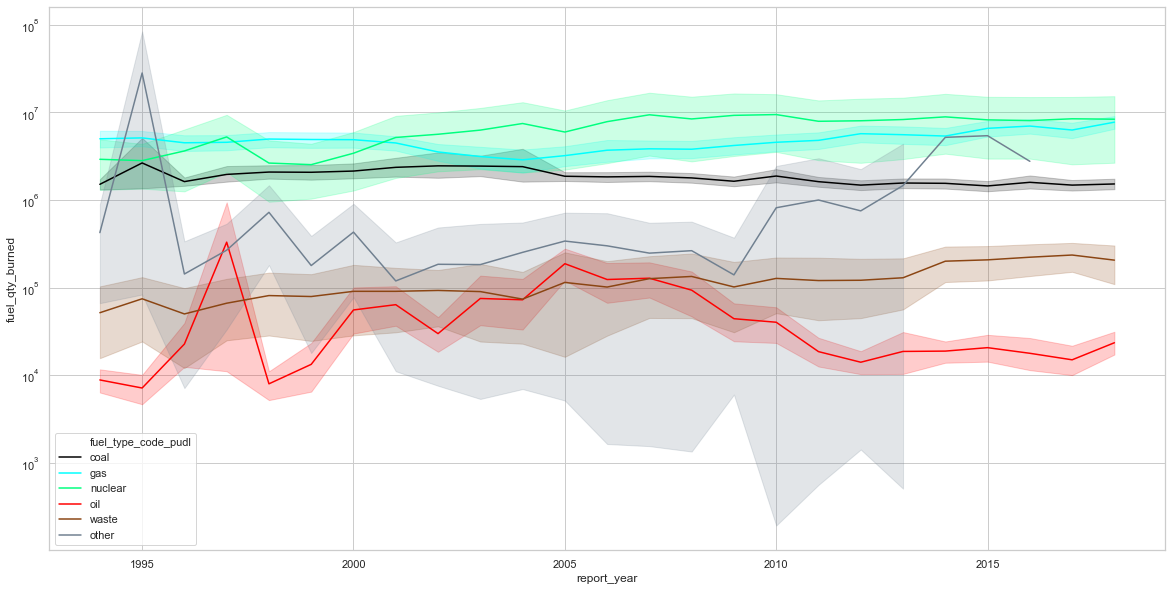

In [19]:
g=sns.lineplot(x='report_year', y='fuel_qty_burned',hue='fuel_type_code_pudl',palette=col,data=fuel_data)
g.set_yscale("log")


**Observations**
 * The quantity of **coal** burned has stayed realtively stable over the 20 years but it is on a slight decline 
 * The quantity of **gas** burned has stayed realtively stable over the 20 years but is on a slight rise
 * The quantity of **oil** burned has drastically reduced
 * The quantity of **nuclear** burned is on a rise
 * The quantity of **other**  burned is on a rise
 * The quantity of **waste** burned is on a rise

In [20]:
#lets look at the data set closer to see any popularity spikes we may have missed
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
#spliting dataframes

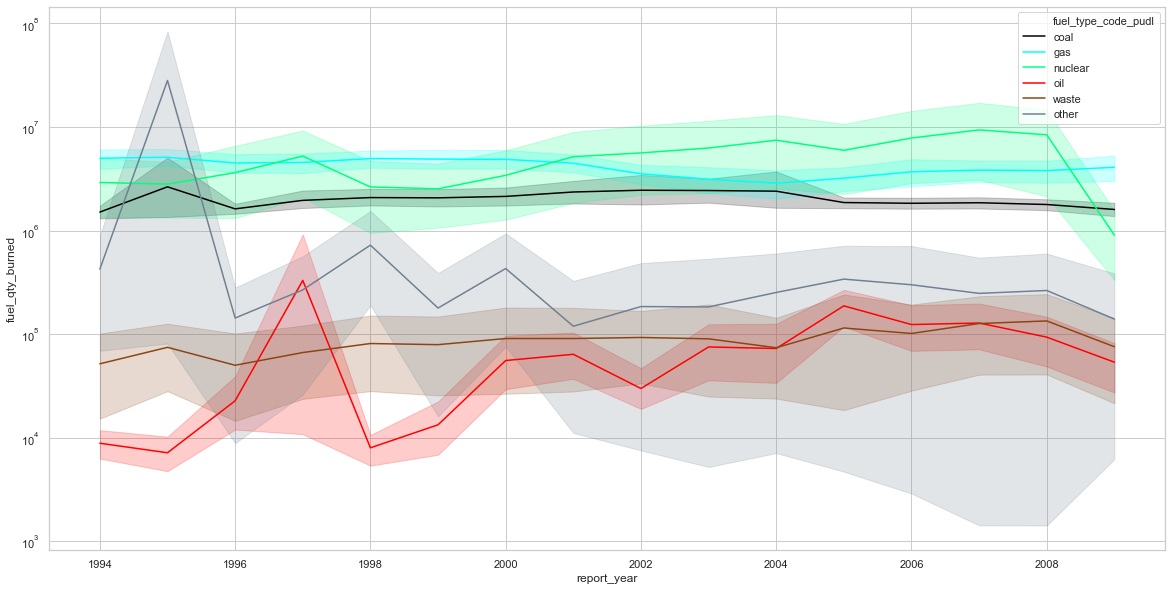

In [21]:
g=sns.lineplot(x='report_year', y='fuel_qty_burned',hue='fuel_type_code_pudl',palette=col,data=fuel_df1)
g.set_yscale("log")


**Observations**
Between 1994-2008
 * The quantity of **coal** burned stayed realtively stable 
 * The quantity of **gas** burned has stayed realtively stable over the 20 years but is on a slight rise
 * The quantity of **oil** burned has drastically reduced
 * The quantity of **nuclear** burned saw a decline
 * The quantity of **other**  burned saw a decline after a spike in the beginning
 * The quantity of **waste** burned  saw a decline after aspikein the beginning

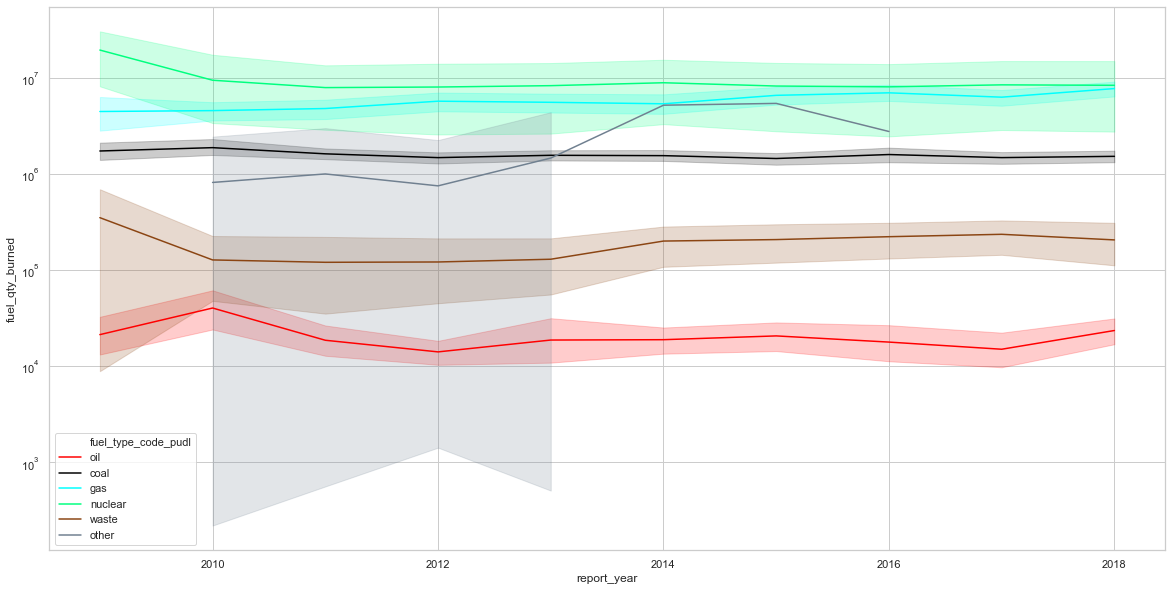

In [22]:
g=sns.lineplot(x='report_year', y='fuel_qty_burned',hue='fuel_type_code_pudl',palette=col,data=fuel_df2)
g.set_yscale("log")

in recent times quantities burned have stayed reakatively stable with small dips and peaks with the notable exception of waste burning

## Utility Id
how are fuel types utilised in each location

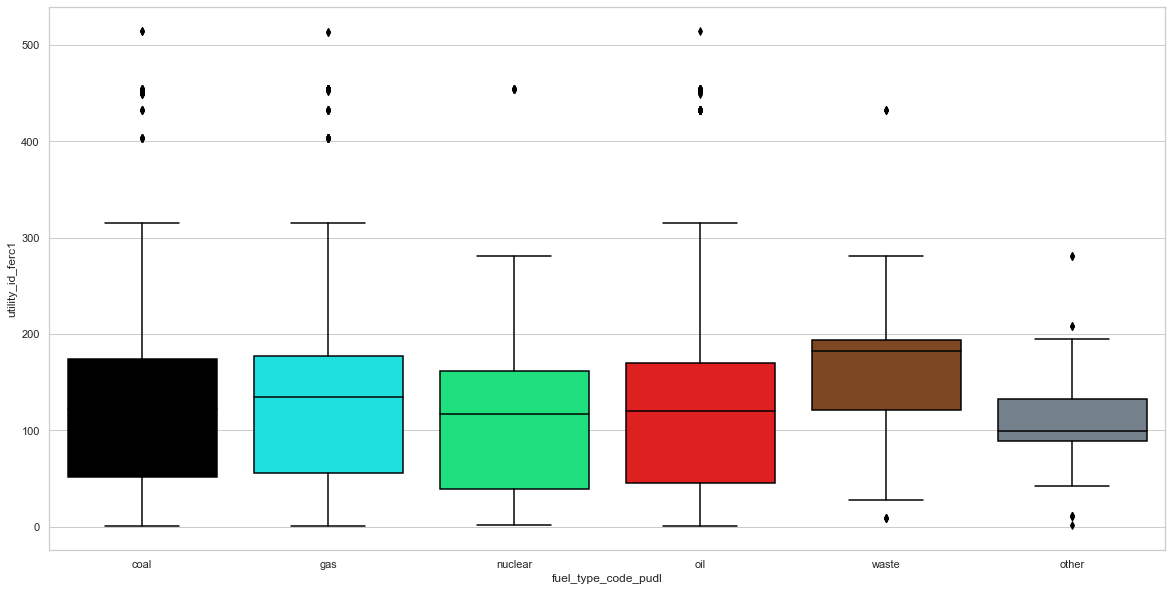

In [23]:
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",palette=col, data=fuel_data)


# efficiency in each zone

[(0, 1000)]

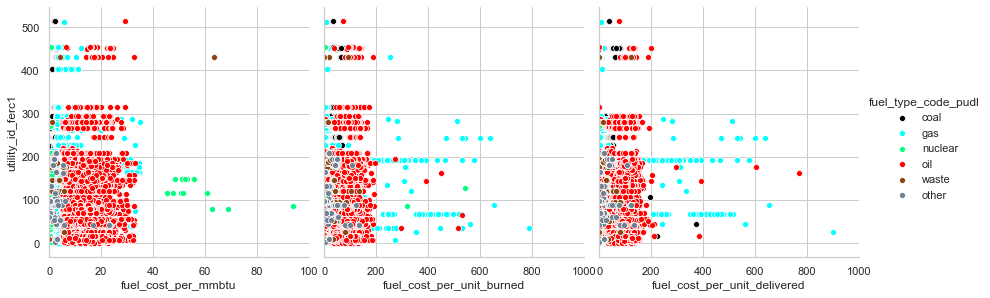

In [24]:
d=sns.pairplot(x_vars=['fuel_cost_per_mmbtu','fuel_cost_per_unit_burned'
                        ,'fuel_cost_per_unit_delivered'], y_vars='utility_id_ferc1',hue='fuel_type_code_pudl'
               ,palette=col,data=fuel_data
                ,height=4,aspect=1)
d.axes[0,0].set(xlim=(0,100))
d.axes[0,1].set(xlim=(0,1000))
d.axes[0,2].set(xlim=(0,1000))
#b.set_yscale("log")
#b.set_xscale("log")

most of the power plants are located i zone 1-300,oil and nuclear power plants are more expensive per mmbtu,
gas is very expensive do burn and deliver (with high operational costs) it makes up for this by being cheep per energy produced, nulear costs varry widly, coal powervery low running and mmbtu cost but has moderate delivery costs,

## Numerical data 
numerical data in this data set includes:
* fuel_qty_burned               
  fuel_mmbtu_per_unit             
  fuel_cost_per_unit_burned     
  fuel_cost_per_unit_delivered  
  fuel_cost_per_mmbtu           

iwill be plotting scatter plots of each numerical variable to glean relation ships           

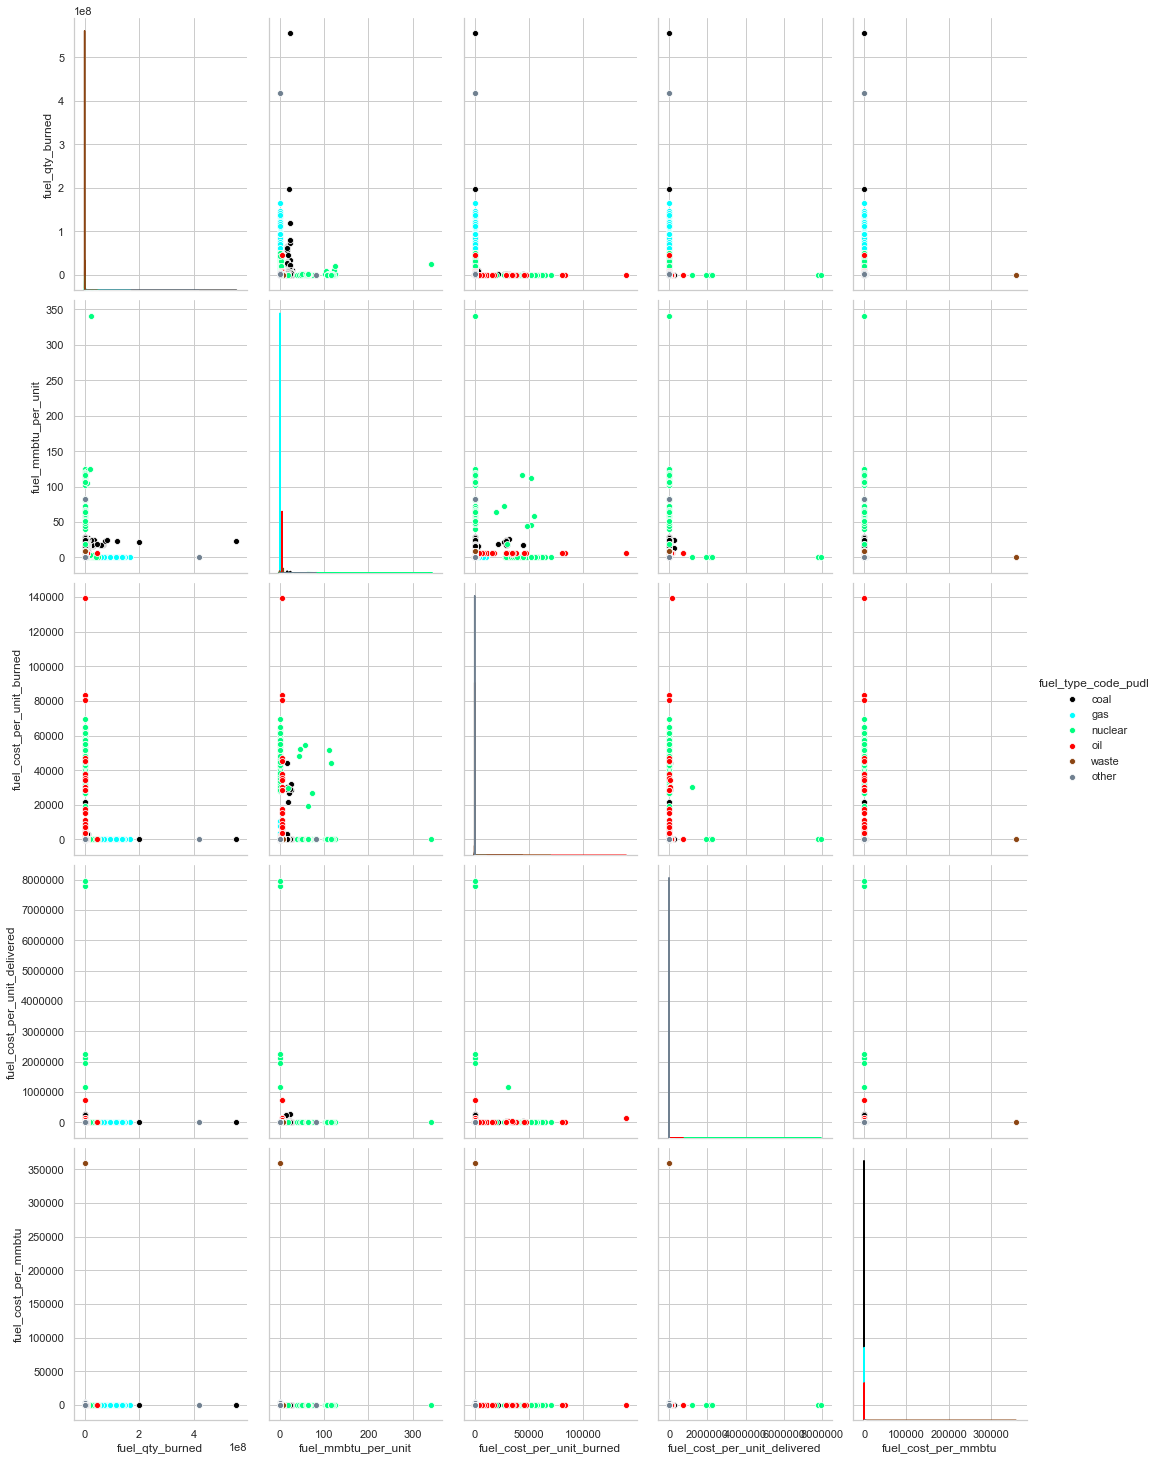

In [25]:
#to get all the scatter plots done at once
a= sns.pairplot(fuel_data, hue='fuel_type_code_pudl',x_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'], y_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'],palette=col,height=4,aspect=0.7)


In [26]:
#b=sns.regplot(x='fuel_cost_per_unit_burned', y='fuel_cost_per_unit_delivered',data=fuel_data)
#b.set_yscale("log")
#b.set_xscale("log")
#log scale omits several relationships so i did not use it

this data set is prone to extreme outliers that reuin all relation ships i have to option to either remove all high values or remove the waste and other, columns as i did above, i either use a sample or limit the dataset axes in order to see relations ships for smaller values

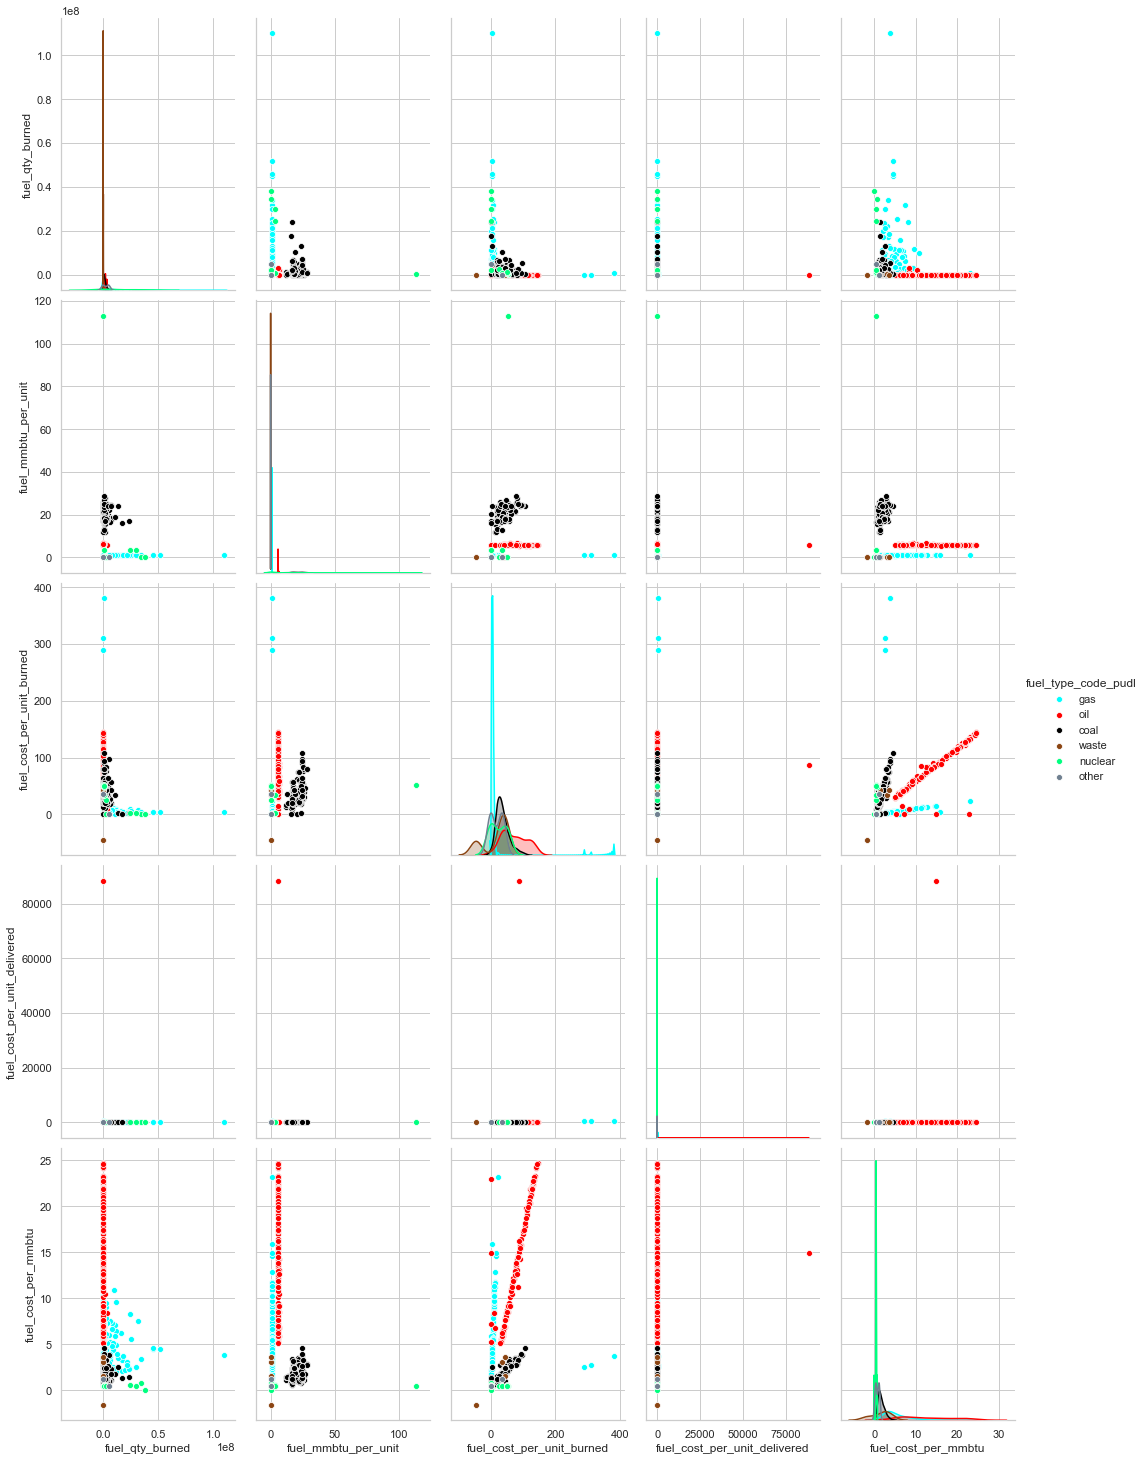

In [27]:
#to get all the scatter plots done at once
a= sns.pairplot(sample_df, hue='fuel_type_code_pudl',x_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'], y_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'],palette=col,height=4,aspect=0.7)

##### Observations
                                    
* fuel quantity distribution: the massive spikes are caused by the other distribution most of the data is withinthe same range
* fuel qty burned vs fuel_cost_per_mmbtu: the expected case the lower the cost the more fuel burned ,the oil quantity oil remaine sort of constant as the price went up
* all vs fuel_mmbtu_per unit: thefuel_mmbtu_per unit for each fuel type thus the form clusters in plots containing fuel mmbtu per unit
* fuel_cost_per_unit delivered vs all: the cost to deliver fuel is relatively constant so they form clusters
* fuel cost per unit burned vs fuel_cost_per_mmbtu: fuel cost per unit burned seems to share a linear relationship with fuel_cost_per_mmbtu especially true in the case of oil and to a lesser extent coal and the others, gas however seems to be at a constant Fuel_cost_per_unit burned or sometimes exhibiting an inverse relationship

i think this is all if there are more please send feedback


In [28]:
#to get all the scatter plots done at once
#a= sns.pairplot(fuel_data, hue='fuel_type_code_pudl',x_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               #,'fuel_cost_per_unit_delivered'
                               #,'fuel_cost_per_mmbtu'],
        #y_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               #,'fuel_cost_per_unit_delivered'
                               #,'fuel_cost_per_mmbtu'],height=7,aspect=0.9)


#a.set(ylim=(0,5000))
#a.set(xlim=(0,5000))
#I did not end up considering it but i highly recommend running it so you can zoom in on the relationships mentione above
#and better yet  set indicidual axis limists

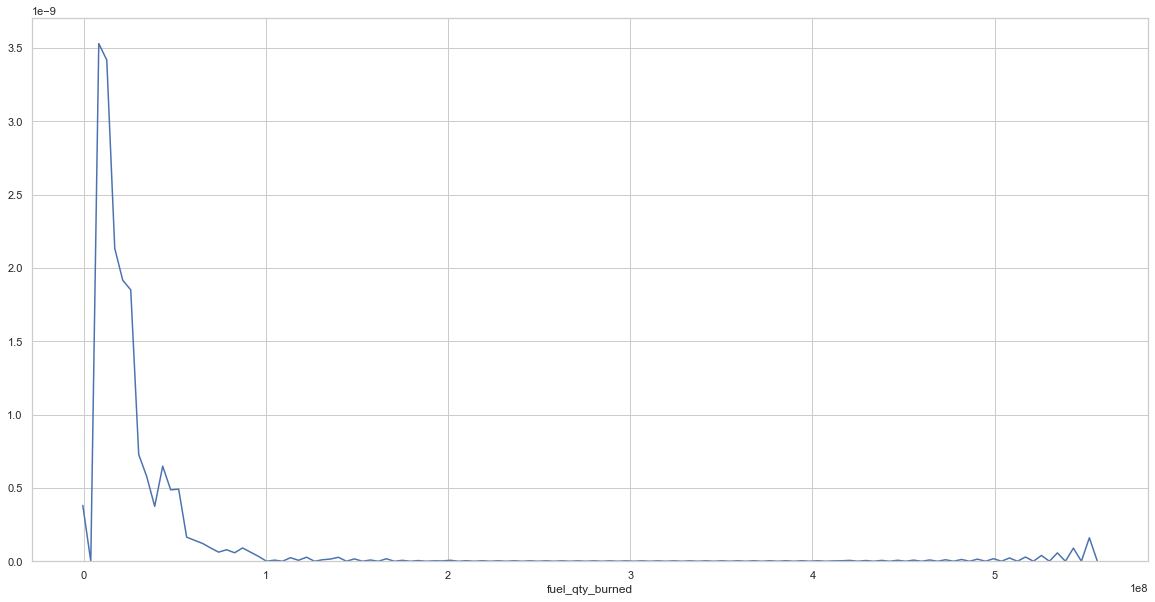

In [29]:
sns.distplot(fuel_data["fuel_qty_burned"],hist=False)
#sns.distplot(fuel_data["fuel_mmbtu_per_unit"])
#sns.distplot(fuel_data["fuel_cost_per_unit_burned"])
#f= sns.distplot(fuel_data["fuel_cost_per_unit_delivered"])
#f.set(xlim=(0,5000))

#this distribution plot looks very weired because a huge bulk of the 
#this is the same for all the data but it give a good idea where to limit the data 
# my idea is that we need to split the data frame by fuel type to see a proper distribution 
#there is a rough version in the pairplot so i wont bother

## New Features 
how much money does each plant actually spend spend oneach stage burning and mmbtu
there some thing that are just not explaine withthe available like the slight difference between delivery cost and fuel cost and cost permmbtu
i theorise there is a difference with operations costs also operation costs are different from energy cost thus 

the power plant groups are produce large quantities of energy which utility groups are producing large amounts of energy,so we need to find the actual ennergy out put of each plant

 


In [30]:
fuel_data["total_burning_cost"]= fuel_data["fuel_cost_per_unit_burned"]*fuel_data["fuel_qty_burned"]
#assuming same quantity burned is the one delivered
fuel_data["total_delivery_cost"]= fuel_data["fuel_cost_per_unit_delivered"]*fuel_data["fuel_qty_burned"]

#how much energy are the plants producing
fuel_data["total_energy_produced"] = fuel_data["fuel_mmbtu_per_unit"]*fuel_data["fuel_qty_burned"]
#how much the total energy cost
fuel_data["total_energy_cost_unit"]=fuel_data["fuel_mmbtu_per_unit"]*fuel_data["fuel_cost_per_unit_burned"]
fuel_data["total_operation_cost_per_unit"]=fuel_data["fuel_cost_per_unit_burned"]+fuel_data["fuel_cost_per_unit_delivered"]
fuel_data.head()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_burning_cost,total_delivery_cost,total_energy_produced,total_energy_cost_unit,total_operation_cost_per_unit
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,9.964487e+07,8.921254e+07,308.40810,37.12
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,1.943231e+08,1.739994e+08,308.27936,37.11
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,1.135474e+08,7.187562e+07,958.44360,77.84
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,1.719789e+08,8.956064e+07,1130.67950,93.20
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,1.122764e+05,4.053300e+04,2.77000,5.54


[(0, 1000)]

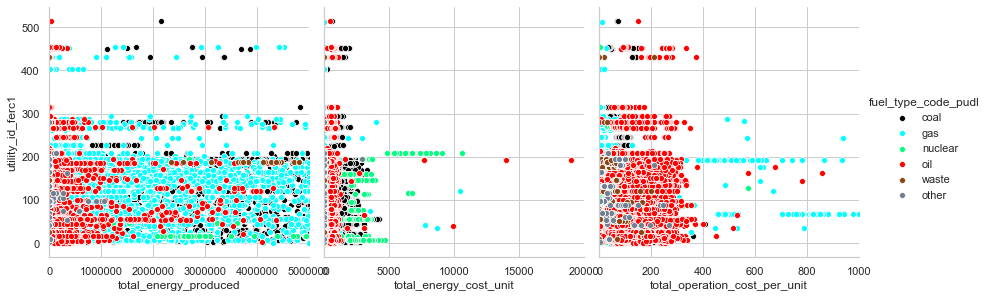

In [31]:
d=sns.pairplot(x_vars=["total_energy_produced","total_energy_cost_unit","total_operation_cost_per_unit"]
               , y_vars='utility_id_ferc1',hue='fuel_type_code_pudl',data=fuel_data
                ,palette=col,height=4,aspect=1)

d.axes[0,0].set(xlim=(0,5000000))
d.axes[0,1].set(xlim=(0,20000))
d.axes[0,2].set(xlim=(0,1000))

#### Observations
* gas coal and oil produce a vast majority of  energy with gas ans coal having high energy counts, and nuclearbeing fewer but consistently higher
* the most expensive  seem to to be oil and nuclear,
* Gas generally has high operating costs


[(0, 1000)]

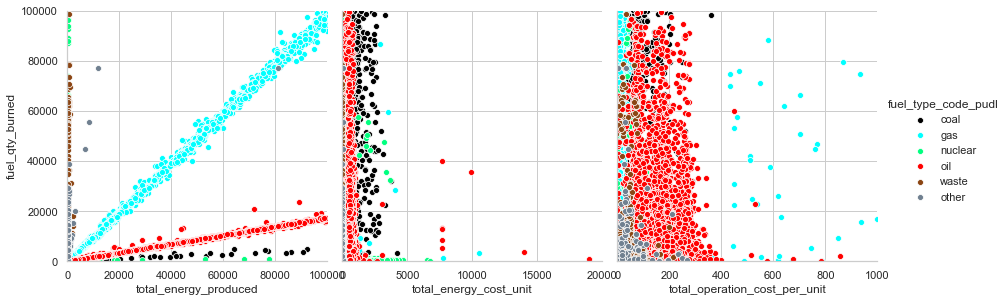

In [32]:
d=sns.pairplot(x_vars=["total_energy_produced","total_energy_cost_unit","total_operation_cost_per_unit"]
               , y_vars='fuel_qty_burned',hue='fuel_type_code_pudl',palette=col,data=fuel_data
                ,height=4,aspect=1)
d.axes[0,0].set(ylim=(0,100000))
d.axes[0,0].set(xlim=(0,100000))
d.axes[0,1].set(xlim=(0,20000))
d.axes[0,2].set(xlim=(0,1000))

the quantity burned has an obvious linear relationshiowith the energy produced, with the exception of waste and other, the energy cost is relativelyconstant forfuel types so they form clusters with a few outliers, same with operation costs

## Conclusion
* if you have made this far thank you very much, i would like to get feedback from you, do you think I am on the right track?

* also please check out [my github](http://github.com/vervainalthor), star this repository, comment on my other projects and follow me if you like 


* Constructive Criticism , Suggestions and General comments are always welcome

